In [1]:
import pandas as pd
from os.path import join, curdir
from os import listdir
from sklearn.linear_model import LogisticRegression
import matplotlib

In [2]:
params = {'backend': 'ps',
#           'text.latex.preamble': [r'\usepackage{gensymb}'],
          'axes.labelsize': 8, # fontsize for x and y labels (was 10)
          'axes.titlesize': 8,
          'font.size': 8, # was 10
          'legend.fontsize': 8, # was 10
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'font.family': 'serif',
}

matplotlib.rcParams.update(params)

In [2]:
def get_all_csv_files():
    files = listdir(curdir)
    csv_files = [file for file in files  if file.endswith('.csv') ]
    return csv_files
    

In [3]:
csv_files = get_all_csv_files()
#csv_files = [file for file in csv_files if ('100_VGG' in file or '10_VGG' in file or 'catdog_VGG' in file) and not 'bnb' in file and not'nbn' in file]# or 'frog' in file)]
#csv_files = [file for file in csv_files if ('100_VGG' in file or '10_VGG' in file or 'catdog_VGG' in file) and not 'bnb' in file and not'nbn' in file]# or 'frog' in file)]
#csv_files = [file for file in csv_files if ('100_VGG' in file or '10_VGG' in file or 'catdog_VGG' in file) and not 'bnb' in file and not'nbn' in file]# or 'frog' in file)]
csv_files = [file for file in csv_files if '_VGG' in file and not'nbn' in file and not 'BIG' in file and not '100' in file]# or 'frog' in file)]

print(csv_files)

['10imbalanced_skew1.0_VGG11_A0.csv', '10imbalanced_skew1.0_VGG11_S_A0.csv', '10imbalanced_skew1.0_VGG11_XS_A0.csv', '10imbalanced_skew1.0_VGG11_XXS_A0.csv', '10imbalanced_skew1.0_VGG11_XXXS_A0.csv', '10imbalanced_skew1.0_VGG11_XXXS_A1.csv', '10imbalanced_skew1.0_VGG13_A0.csv', '10imbalanced_skew1.0_VGG13_S_A0.csv', '10imbalanced_skew1.0_VGG13_XS_A0.csv', '10imbalanced_skew1.0_VGG13_XXS_A0.csv', '10imbalanced_skew1.0_VGG13_XXXS_A0.csv', '10imbalanced_skew1.0_VGG16_A0.csv', '10imbalanced_skew1.0_VGG16_S_A0.csv', '10imbalanced_skew1.0_VGG16_XS_A0.csv', '10imbalanced_skew1.0_VGG16_XXS_A0.csv', '10imbalanced_skew1.0_VGG16_XXXS_A0.csv', '10imbalanced_skew1.0_VGG19_A0.csv', '10imbalanced_skew1.0_VGG19_S_A0.csv', '10imbalanced_skew1.0_VGG19_XS_A0.csv', '10imbalanced_skew1.0_VGG19_XXS_A0.csv', '10imbalanced_skew1.0_VGG19_XXXS_A0.csv', '10_VGG11_A0.csv', '10_VGG11_A2.csv', '10_VGG11_S_2.csv', '10_VGG11_S_A0.csv', '10_VGG11_XS_1.csv', '10_VGG11_XS_2.csv', '10_VGG11_XS_A0.csv', '10_VGG11_XXS_1.cs

In [4]:
import re

regex_ft = 'train_features\d'
regex_clf = 'train_classifier\d'
regex_cnv = 'train_conv\d\d'
regex_fc = 'train_fc.*'


def filter_columns(columns):
    res = []
    highest_clf = higher_clf_0
    for col in columns:
        if re.match(regex_ft, col) or re.match(regex_cnv, col) or re.match(regex_fc):
            res.append(col)
        elif(re.match(regex_clf, col)):
            if int(highest-clf[-1]) < int(col[-1]):
                highest_clf = col
            res.append(col)
    col = col.remove(highest_clf)
    return col

def compute_average_saturation(epoch_df):
    cols = list(epoch_df.columns)
    val = 0
    #print(cols)
    c = 0
    for col in cols:
        if 'eval' in col or 'accuracy' in col or 'loss' in col or 'epoch' in col or 'time_per_step' in col or 'train_classifier6' in col: 
            continue
        print(col)
        c += 1
        val += epoch_df[col].values
    return val / c


def get_final_epoch_accuracies(files):
    result = []
    for csv_file in files:
        print(csv_file)
        res = {}
        file = pd.DataFrame.from_csv(csv_file, sep=';')
        try:
            
            divisor = 2 if 'catdog' in csv_file else 10
            divisor = 1
            
            last_epoch = file[file['epoch'] == 20]

            res['test_acc'] = last_epoch['test_accuracy'].values[0]
            res['test_loss'] = last_epoch['test_loss'].values[0] / divisor
            res['train_acc'] = last_epoch['train_accuracy'].values[0]
            res['train_loss'] = last_epoch['train_loss'].values[0] / divisor
            res['average_sat'] = compute_average_saturation(last_epoch)[0]
            res['name'] = csv_file.split('.csv')[0]
        except:
            continue
        result.append(res)
    return result

def get_all_epoch_data(files):
    result = []
    for csv_file in files:
        print(csv_file)
        res = {}
        file = pd.DataFrame.from_csv(csv_file, sep=';')
        try:
            
            divisor = 2 if 'catdog' in csv_file else 10
            if '100' in csv_file:
                divisor = 100
            divisor = 1
            
            last_epoch = file

            res['test_acc'] = last_epoch['test_accuracy'].values
            res['test_loss'] = last_epoch['test_loss'].values / divisor
            res['train_acc'] = last_epoch['train_accuracy'].values
            res['train_loss'] = last_epoch['train_loss'].values 
            res['average_sat'] = [compute_average_saturation(last_epoch[last_epoch['epoch']==i]) for i in range(20)]
            res['name'] = csv_file.split('.csv')
        except:
            continue
        result.append(res)
    return result

In [5]:
result = get_final_epoch_accuracies(csv_files)
#all_epoch_results = get_all_epoch_data(csv_files) 

10imbalanced_skew1.0_VGG11_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10imbalanced_skew1.0_VGG11_S_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10imbalanced_skew1.0_VGG11_XS_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10imbalanced_skew1.0_VGG11_XXS_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10imbalanced_skew1.0_VGG11_XXXS_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10imbalanced_skew1.0_VGG11_XXXS_A1.csv
10imbalanced_skew1.0_V

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10_VGG11_XXS_1.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10_VGG11_XXS_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10_VGG11_XXXS_1.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10_VGG11_XXXS_A0.csv
train_features0
train_features4
train_features8
train_features11
train_features15
train_features18
train_features22
train_features25
train_classifier2
10_VGG13_A0.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features21
train_features24
train_features28

train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features21
train_features24
train_features28
train_features31
train_classifier2
catdog_VGG13_S_2.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features21
train_features24
train_features28
train_features31
train_classifier2
catdog_VGG13_S_A0.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features21
train_features24
train_features28
train_features31
train_classifier2
catdog_VGG13_S_A3.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features21
train_features24
train_features28
train_features31
train_classifier2
catdog_VGG13_S_A4.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features21
train_features24
train_features28
train_features31
train_

train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features20
train_features23
train_features27
train_features30
train_features33
train_features36
train_features40
train_features43
train_features46
train_features49
train_classifier2
cd_128_VGG11VGG19VGG19_XXXS_A1.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features20
train_features23
train_features27
train_features30
train_features33
train_features36
train_features40
train_features43
train_features46
train_features49
train_classifier2
cd_128_VGG11_XXXS_A0.csv
train_features0
train_features3
train_features7
train_features10
train_features14
train_features17
train_features20
train_features23
train_features27
train_features30
train_features33
train_features36
train_features40
train_features43
train_features46
train_features49
train_classifier2
cd_128_VGG11_XXXS_A1.csv
train_features0
train_features3
train_features7
train_

In [6]:

"""
for res in all_epoch_results:
    try:
    #if True:
        plt.figure(figsize=(10,5))
        plt.title(res['name'][0])
        plt.plot(list(range(20)),res['test_acc'][1:], label='acc')
        plt.show()
        plt.figure(figsize=(10,5))
        plt.plot(list(range(20)),np.array(res['average_sat']), label='sat')
        plt.legend()
        
        plt.show()
    except:
        continue
"""

"\nfor res in all_epoch_results:\n    try:\n    #if True:\n        plt.figure(figsize=(10,5))\n        plt.title(res['name'][0])\n        plt.plot(list(range(20)),res['test_acc'][1:], label='acc')\n        plt.show()\n        plt.figure(figsize=(10,5))\n        plt.plot(list(range(20)),np.array(res['average_sat']), label='sat')\n        plt.legend()\n        \n        plt.show()\n    except:\n        continue\n"

In [7]:
print(result)
import numpy as np

[{'test_acc': 0.8665, 'test_loss': 0.003320103514194489, 'train_acc': 0.93314, 'train_loss': 0.0015503320200741294, 'average_sat': 28.14666666666667, 'name': '10imbalanced_skew1.0_VGG11_A0'}, {'test_acc': 0.8357, 'test_loss': 0.00403153568506241, 'train_acc': 0.90066, 'train_loss': 0.0022582134519517428, 'average_sat': 42.623333333333335, 'name': '10imbalanced_skew1.0_VGG11_S_A0'}, {'test_acc': 0.8083, 'test_loss': 0.00454896314740181, 'train_acc': 0.8475600000000001, 'train_loss': 0.0035090531387925146, 'average_sat': 54.513333333333335, 'name': '10imbalanced_skew1.0_VGG11_XS_A0'}, {'test_acc': 0.7298, 'test_loss': 0.0062475737214088434, 'train_acc': 0.7648199999999999, 'train_loss': 0.005433967106342316, 'average_sat': 63.88666666666667, 'name': '10imbalanced_skew1.0_VGG11_XXS_A0'}, {'test_acc': 0.6164, 'test_loss': 0.008456563538312912, 'train_acc': 0.6339199999999999, 'train_loss': 0.008354220584630966, 'average_sat': 66.66666666666667, 'name': '10imbalanced_skew1.0_VGG11_XXXS_A0'}

In [8]:
all_test_acc = np.array([res['test_acc'] for res in result])
all_train_acc = np.array([res['train_acc'] for res in result])

all_test_loss = np.array([res['test_loss'] for res in result])
all_train_loss = np.array([res['train_loss'] for res in result])

all_average_sat = np.array([res['average_sat'] for res in result])
print(all_average_sat)
all_names = np.array([res['name'] for res in result])

all_problem = np.array([name.split('_')[0] for name in all_names])
all_problem[all_problem == '10'] = 'CIFAR10'
all_problem[all_problem == '10imbalanced'] = 'Imb. CIFAR10'
all_problem[all_problem == 'catdog'] = 'cat-vs-dog'
all_problem[all_problem == '100'] = 'CIFAR100'

all_networks = [name.split('_')[1] for name in all_names if 'VGG' in name.split('_')[1]]
all_networks_filtered  = []
filter_sizes = []
depth = []
for i in range(len(all_names)):
    if 'VGG11_A' in all_names[i]:
        all_networks_filtered.append('VGG11')
        filter_sizes.append('full Filtersize')
    elif 'VGG13_A' in all_names[i]:
        all_networks_filtered.append('VGG13')
        filter_sizes.append('full Filtersize')
    elif 'VGG16_A' in all_names[i]:
        all_networks_filtered.append('VGG16')
        filter_sizes.append('full Filtersize')
    elif 'VGG19_A' in all_names[i]:
        all_networks_filtered.append('VGG19')
        filter_sizes.append('full Filtersize')
    elif 'VGG11_S' in all_names[i]:
        all_networks_filtered.append('VGG11')
        filter_sizes.append('halfed Filtersize')
    elif 'VGG11_XS' in all_names[i]:
        all_networks_filtered.append('VGG11')
        filter_sizes.append('quarter Filtersize')
    elif 'VGG11_XXS' in all_names[i]:
        all_networks_filtered.append('VGG11')
        filter_sizes.append('eigths Filtersize')
    elif 'VGG11_XXXS' in all_names[i]:
        all_networks_filtered.append('VGG11')
        filter_sizes.append('sixteenth Filtersize')
    elif 'VGG13_S' in all_names[i]:
        all_networks_filtered.append('VGG13')
        filter_sizes.append('halfed Filtersize')
    elif 'VGG13_XS' in all_names[i]:
        all_networks_filtered.append('VGG13')
        filter_sizes.append('quarter Filtersize')
    elif 'VGG13_XXS' in all_names[i]:
        all_networks_filtered.append('VGG13')
        filter_sizes.append('eigths Filtersize')
    elif 'VGG13_XXXS' in all_names[i]:
        all_networks_filtered.append('VGG13')
        filter_sizes.append('sixteenth Filtersize')
    elif 'VGG16_S' in all_names[i]:
        all_networks_filtered.append('VGG16')
        filter_sizes.append('halfed Filtersize')
    elif 'VGG16_XS' in all_names[i]:
        all_networks_filtered.append('VGG16')
        filter_sizes.append('quarter Filtersize')
    elif 'VGG16_XXS' in all_names[i]:
        all_networks_filtered.append('VGG16')
        filter_sizes.append('eigths Filtersize')
    elif 'VGG16_XXXS' in all_names[i]:
        all_networks_filtered.append('VGG16')
        filter_sizes.append('sixteenth Filtersize')
    elif 'VGG19_S' in all_names[i]:
        all_networks_filtered.append('VGG19')
        filter_sizes.append('halfed Filtersize')
    elif 'VGG19_XS' in all_names[i]:
        all_networks_filtered.append('VGG19')
        filter_sizes.append('quarter Filtersize')
    elif 'VGG19_XXS' in all_names[i]:
        all_networks_filtered.append('VGG19')
        filter_sizes.append('eigths Filtersize')
    elif 'VGG19_XXXS' in all_names[i]:
        all_networks_filtered.append('VGG19')
        filter_sizes.append('sixteenth Filtersize')
    else:
        all_networks_filtered.append('LEL')
        print(all_names[i], 'LEL')

all_networks_filtered = np.array(all_networks_filtered)
unique_networks_filtered = list(set(all_networks_filtered))
filter_sizes = np.array(filter_sizes)
unique_networks_filtersize = np.array(list(set(filter_sizes)))

unique_problem = np.array(list(set(all_problem)))
unique_problem = unique_problem[unique_problem != 'BIG10']
print(all_problem)
print(unique_problem)
print(unique_networks_filtered)

all_acc_gap = all_train_acc - all_test_acc
all_loss_gap = (all_test_loss - all_train_loss) 

[28.14666667 42.62333333 54.51333333 63.88666667 66.66666667 34.94363636
 48.61545455 58.23909091 64.77181818 68.46454545 28.13928571 41.63142857
 52.4        62.94642857 67.40928571 23.10411765 33.27176471 45.54235294
 55.97411765 62.50058824 28.38666667 48.29545455 42.44666667 40.84222222
 55.20888889 55.20666667 65.79777778 63.88777778 71.17888889 67.35888889
 34.69363636 40.70928571 35.15727273 60.29818182 60.51181818 61.50545455
 66.62       66.05090909 69.88636364 69.88636364 27.985      40.23428571
 27.94285714 53.18071429 52.34428571 51.78642857 62.94571429 61.94142857
 69.19642857 67.63357143 23.33352941 22.87411765 33.86941176 34.03
 43.29117647 44.11823529 54.96294118 55.69764706 64.33882353 63.97058824
 11.15222222 27.13090909 10.89333333 10.89333333 10.98       20.28333333
 19.54333333 19.89222222 30.55555556 34.11333333 32.63888889 35.59
 30.90444444 32.46555556 47.91555556 48.78333333 48.61       47.74444444
 50.86666667 62.15333333 64.58444444 59.37666667 64.23555556 15

In [9]:
from matplotlib import pyplot as plt
from numpy.polynomial.polynomial import polyfit
from scipy import optimize as opt


# Test Accuracy

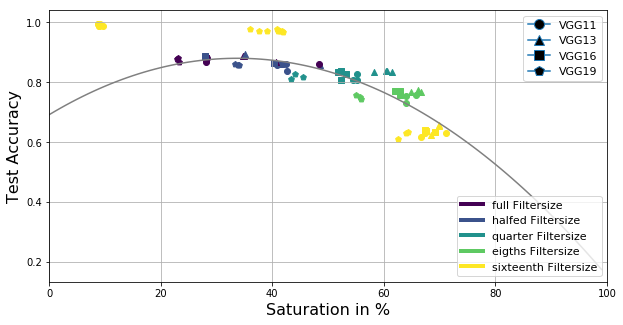

In [10]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
b10, m10, n10 = polyfit(all_average_sat[all_problem == 'CIFAR10'], all_test_acc[all_problem == 'CIFAR10'], 2)
b2, m2, n2 = polyfit(all_average_sat[all_problem == 'cat-vs-dog'], all_test_acc[all_problem == 'cat-vs-dog'], 2)

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('viridis')

network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='^',  label='VGG13',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='s', label='VGG16',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='p', label='VGG19',
                         markerfacecolor='black', 
                         markersize=10),]

depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)]

x = np.arange(0, 100, 1)

colors = {
    'full Filtersize': cmap(0.0),
    'halfed Filtersize' : cmap(0.25),
    'quarter Filtersize' : cmap(0.5),
    'eigths Filtersize': cmap(0.75),
    'sixteenth Filtersize': cmap(1.0)
}


network_depth = {
    'VGG11': 'o',
    'VGG13': '^',
    'VGG16': 's',
    'VGG19': 'p'
}

filter_legend = []



for i in range(len(all_average_sat)):
    if 'cat-vs-dog' in all_problem[i]:
        continue
    ax.scatter(x=all_average_sat[i], y=all_test_acc[i], color=colors[filter_sizes[i]], marker=network_depth[all_networks_filtered[i]])
#plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
#ax.plot(x, n2*(x**2)+m2*x+b2, c='green')
ax.plot(x, n10*(x**2)+m10*x+b10, c='grey')

l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
ax = plt.gca().add_artist(l1)
plt.legend(depth_legend, ['full Filtersize', 
                           'halfed Filtersize', 
                           'quarter Filtersize', 
                          'eigths Filtersize',
                          'sixteenth Filtersize'], loc=4, prop={'size': 11})
plt.xlim((0,100))

#for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
#    plt.annotate(all_names[i], xy)

#plt.legend(prop={'size': 13})
plt.grid()



    
#plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
plt.xlabel('Saturation in %', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=16)

plt.show()

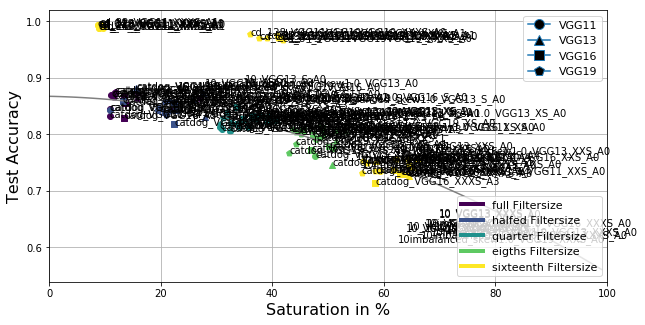

In [12]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
b10, m10, n10 = polyfit(all_average_sat[all_problem == 'CIFAR10'], all_test_acc[all_problem == 'CIFAR10'], 2)
b2, m2, n2 = polyfit(all_average_sat[all_problem == 'cat-vs-dog'], all_test_acc[all_problem == 'cat-vs-dog'], 2)

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('viridis')


network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='^',  label='VGG13',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='s', label='VGG16',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='p', label='VGG19',
                         markerfacecolor='black', 
                         markersize=10),]

depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)]

x = np.arange(0, 100, 1)

colors = {
    'full Filtersize': cmap(0.0),
    'halfed Filtersize' : cmap(0.25),
    'quarter Filtersize' : cmap(0.5),
    'eigths Filtersize': cmap(0.75),
    'sixteenth Filtersize': cmap(1.0)
}

network_depth = {
    'VGG11': 'o',
    'VGG13': '^',
    'VGG16': 's',
    'VGG19': 'p'
}

filter_legend = []



for i in range(len(all_average_sat)):
    if 'CIFAR' in all_problem[i]:
        continue
    ax.scatter(x=all_average_sat[i], y=all_test_acc[i], color=colors[filter_sizes[i]], marker=network_depth[all_networks_filtered[i]])
#plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
ax.plot(x, n2*(x**2)+m2*x+b2, c='grey')
#.plot(x, n10*(x**2)+m10*x+b10, c='grey')

l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
ax = plt.gca().add_artist(l1)
plt.legend(depth_legend, ['full Filtersize', 
                           'halfed Filtersize', 
                           'quarter Filtersize', 
                          'eigths Filtersize',
                          'sixteenth Filtersize'], loc=4, prop={'size': 11})

for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
    plt.annotate(all_names[i], xy)
plt.xlim((0,100))

#plt.legend(prop={'size': 13})
plt.grid()



    
#plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
plt.xlabel('Saturation in %', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=16)

plt.show()

# Test Loss 

In [13]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
b10, m10, n10 = polyfit(all_average_sat[all_problem == 'CIFAR10'], all_test_loss[all_problem == 'CIFAR10'], 2)
b2, m2, n2 = polyfit(all_average_sat[all_problem == 'cat-vs-dog'], all_test_loss[all_problem == 'cat-vs-dog'], 2)

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('viridis')

network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='^',  label='VGG13',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='s', label='VGG16',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='p', label='VGG19',
                         markerfacecolor='black', 
                         markersize=10),]

depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)]

x = np.arange(0, 100, 1)

colors = {
    'full Filtersize': cmap(0.0),
    'halfed Filtersize' : cmap(0.25),
    'quarter Filtersize' : cmap(0.5),
    'eigths Filtersize': cmap(0.75),
    'sixteenth Filtersize': cmap(1.0)
}


network_depth = {
    'VGG11': 'o',
    'VGG13': '^',
    'VGG16': 's',
    'VGG19': 'p'
}

filter_legend = []



for i in range(len(all_average_sat)):
    if 'cat-vs-dog' in all_problem[i]:
        continue
    ax.scatter(x=all_average_sat[i], y=all_test_loss[i], color=colors[filter_sizes[i]], marker=network_depth[all_networks_filtered[i]])
#plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
#ax.plot(x, n2*(x**2)+m2*x+b2, c='green')
ax.plot(x, n10*(x**2)+m10*x+b10, c='grey')

l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
ax = plt.gca().add_artist(l1)
plt.legend(depth_legend, ['full Filtersize', 
                           'halfed Filtersize', 
                           'quarter Filtersize', 
                          'eigths Filtersize',
                          'sixteenth Filtersize'], loc=4, prop={'size': 11})

#for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
#    plt.annotate(all_names[i], xy)
plt.xlim((0,100))

#plt.legend(prop={'size': 13})
plt.grid()



    
#plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
plt.xlabel('Saturation in %', fontsize=16)
plt.ylabel('Test Loss', fontsize=16)

plt.show()

In [14]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
b10, m10, n10 = polyfit(all_average_sat[all_problem == 'CIFAR10'], all_test_loss[all_problem == 'CIFAR10'], 2)
b2, m2, n2 = polyfit(all_average_sat[all_problem == 'cat-vs-dog'], all_test_loss[all_problem == 'cat-vs-dog'], 2)

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('viridis')


network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='^',  label='VGG13',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='s', label='VGG16',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='p', label='VGG19',
                         markerfacecolor='black', 
                         markersize=10),]

depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)]

x = np.arange(0, 100, 1)

colors = {
    'full Filtersize': cmap(0.0),
    'halfed Filtersize' : cmap(0.25),
    'quarter Filtersize' : cmap(0.5),
    'eigths Filtersize': cmap(0.75),
    'sixteenth Filtersize': cmap(1.0)
}

network_depth = {
    'VGG11': 'o',
    'VGG13': '^',
    'VGG16': 's',
    'VGG19': 'p'
}

filter_legend = []



for i in range(len(all_average_sat)):
    if 'CIFAR' in all_problem[i]:
        continue
    ax.scatter(x=all_average_sat[i], y=all_test_loss[i], color=colors[filter_sizes[i]], marker=network_depth[all_networks_filtered[i]])
#plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
ax.plot(x, n2*(x**2)+m2*x+b2, c='grey')
#plt.plot(x, n10*(x**2)+m10*x+b10, c='grey')

l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
ax = plt.gca().add_artist(l1)
plt.legend(depth_legend, ['full Filtersize', 
                           'halfed Filtersize', 
                           'quarter Filtersize', 
                          'eigths Filtersize',
                          'sixteenth Filtersize'], loc=4, prop={'size': 11})

plt.xlim((0,100))

#for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
#    plt.annotate(all_names[i], xy)

#plt.legend(prop={'size': 13})
plt.grid()



    
#plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
plt.xlabel('Saturation in %', fontsize=16)
plt.ylabel('Test Loss', fontsize=16)

plt.show()

# Train Loss

In [15]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
b10, m10, n10 = polyfit(all_average_sat[all_problem == 'CIFAR10'], all_train_loss[all_problem == 'CIFAR10'], 2)
b2, m2, n2 = polyfit(all_average_sat[all_problem == 'cat-vs-dog'], all_train_loss[all_problem == 'cat-vs-dog'], 2)

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('viridis')

network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='^',  label='VGG13',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='s', label='VGG16',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='p', label='VGG19',
                         markerfacecolor='black', 
                         markersize=10),]

depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)]

x = np.arange(0, 100, 1)

colors = {
    'full Filtersize': cmap(0.0),
    'halfed Filtersize' : cmap(0.25),
    'quarter Filtersize' : cmap(0.5),
    'eigths Filtersize': cmap(0.75),
    'sixteenth Filtersize': cmap(1.0)
}


network_depth = {
    'VGG11': 'o',
    'VGG13': '^',
    'VGG16': 's',
    'VGG19': 'p'
}

filter_legend = []



for i in range(len(all_average_sat)):
    if 'cat-vs-dog' in all_problem[i]:
        continue
    ax.scatter(x=all_average_sat[i], y=all_train_loss[i], color=colors[filter_sizes[i]], marker=network_depth[all_networks_filtered[i]])
#plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
#ax.plot(x, n2*(x**2)+m2*x+b2, c='green')
ax.plot(x, n10*(x**2)+m10*x+b10, c='grey')

l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
ax = plt.gca().add_artist(l1)
plt.legend(depth_legend, ['full Filtersize', 
                           'halfed Filtersize', 
                           'quarter Filtersize', 
                          'eigths Filtersize',
                          'sixteenth Filtersize'], loc=4, prop={'size': 11})

#for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
#    plt.annotate(all_names[i], xy)
plt.xlim((0,100))

#plt.legend(prop={'size': 13})
plt.grid()



    
#plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
plt.xlabel('Saturation in %', fontsize=16)
plt.ylabel('Test Loss', fontsize=16)

plt.show()

In [16]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#b, m, n = polyfit(all_average_sat[all_problem == 'CIFAR100'], all_test_acc[all_problem == 'CIFAR100'], 2)
b10, m10, n10 = polyfit(all_average_sat[all_problem == 'CIFAR10'], all_train_loss[all_problem == 'CIFAR10'], 2)
b2, m2, n2 = polyfit(all_average_sat[all_problem == 'cat-vs-dog'], all_train_loss[all_problem == 'cat-vs-dog'], 2)

fig, ax = plt.subplots(figsize=(10,5))

cmap = plt.get_cmap('viridis')


network_legend = [Line2D([0], [0], marker='o', label='VGG11',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='^',  label='VGG13',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='s', label='VGG16',
                         markerfacecolor='black', 
                         markersize=10),
                 Line2D([0], [0], marker='p', label='VGG19',
                         markerfacecolor='black', 
                         markersize=10),]

depth_legend  = [Line2D([0], [0], color=cmap(0.0), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)]

x = np.arange(0, 100, 1)

colors = {
    'full Filtersize': cmap(0.0),
    'halfed Filtersize' : cmap(0.25),
    'quarter Filtersize' : cmap(0.5),
    'eigths Filtersize': cmap(0.75),
    'sixteenth Filtersize': cmap(1.0)
}

network_depth = {
    'VGG11': 'o',
    'VGG13': '^',
    'VGG16': 's',
    'VGG19': 'p'
}

filter_legend = []



for i in range(len(all_average_sat)):
    if 'CIFAR' in all_problem[i]:
        continue
    ax.scatter(x=all_average_sat[i], y=all_train_loss[i], color=colors[filter_sizes[i]], marker=network_depth[all_networks_filtered[i]])
#plt.plot(x, n*(x**2)+m*x+b, c='orange', label='CIFAR100 regression parabola')
ax.plot(x, n2*(x**2)+m2*x+b2, c='grey')
#plt.plot(x, n10*(x**2)+m10*x+b10, c='grey')

l1 = plt.legend(network_legend, ['VGG11', 'VGG13', 'VGG16', 'VGG19'], loc=1, prop={'size': 11})
ax = plt.gca().add_artist(l1)
plt.legend(depth_legend, ['full Filtersize', 
                           'halfed Filtersize', 
                           'quarter Filtersize', 
                          'eigths Filtersize',
                          'sixteenth Filtersize'], loc=4, prop={'size': 11})

plt.xlim((0,100))

#for i, xy in enumerate(zip(all_average_sat, all_test_acc)):
#    plt.annotate(all_names[i], xy)

#plt.legend(prop={'size': 13})
plt.grid()



    
#plt.title('Average Layer Saturation at Training Time versus Test Accuracy')
plt.xlabel('Saturation in %', fontsize=16)
plt.ylabel('Train Loss', fontsize=16)

plt.show()